# Predicting seeds dataset


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

seeds = pd.read_csv('seeds_dataset.csv')
seeds.head()
print(seeds.shape)
print(seeds.head())

(211, 11)
   obs   area  perimeter  compactness  length  width volume  location  \
0    1  15.26      14.84       0.8710   5.763  3.312      .       NaN   
1    2  14.88      14.57       0.8811   5.554  3.333    NaN       NaN   
2    3  14.29      14.09       0.9050   5.291  3.337    NaN       NaN   
3    4  13.84      13.94       0.8955   5.324  3.379      ;       NaN   
4    5  16.14      14.99       0.9034   5.658  3.562    NaN       NaN   

   asymmetry  grooveLength  variety  
0      2.221         5.220      1.0  
1      1.018         4.956      1.0  
2      2.699         4.825      1.0  
3      2.259         4.805      1.0  
4      1.355         5.175      1.0  


In [3]:
seeds.info()
seeds.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   obs           211 non-null    int64  
 1   area          210 non-null    float64
 2   perimeter     210 non-null    float64
 3   compactness   210 non-null    float64
 4   length        210 non-null    float64
 5   width         210 non-null    float64
 6   volume        6 non-null      object 
 7   location      0 non-null      float64
 8   asymmetry     210 non-null    float64
 9   grooveLength  210 non-null    float64
 10  variety       210 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 18.3+ KB


,obs,area,perimeter,compactness,length,width,location,asymmetry,grooveLength,variety
count,211.00000,210.000000,210.000000,210.000000,210.000000,210.000000,0.0,210.000000,210.000000,210.000000
mean,106.00000,14.847524,14.559286,0.870999,5.628533,3.258605,NaN,3.700201,5.408071,2.000000
std,61.05462,2.909699,1.305959,0.023629,0.443063,0.377714,NaN,1.503557,0.491480,0.818448
min,1.00000,10.590000,12.410000,0.808100,4.899000,2.630000,NaN,0.765100,4.519000,1.000000
25%,53.50000,12.270000,13.450000,0.856900,5.262250,2.944000,NaN,2.561500,5.045000,1.000000
50%,106.00000,14.355000,14.320000,0.873450,5.523500,3.237000,NaN,3.599000,5.223000,2.000000
75%,158.50000,17.305000,15.715000,0.887775,5.979750,3.561750,NaN,4.768750,5.877000,3.000000
max,211.00000,21.180000,17.250000,0.918300,6.675000,4.033000,NaN,8.456000,6.550000,3.000000


In [4]:
seeds_classes = ['obs','area','perimeter','compactness','length','width','volume','location','asymmetry','grooveLength','variety']

with pd.option_context('display.max_row', None):
    print(seeds)

     obs   area  perimeter  compactness  length  width volume  location  \
0      1  15.26      14.84       0.8710   5.763  3.312      .       NaN   
1      2  14.88      14.57       0.8811   5.554  3.333    NaN       NaN   
2      3  14.29      14.09       0.9050   5.291  3.337    NaN       NaN   
3      4  13.84      13.94       0.8955   5.324  3.379      ;       NaN   
4      5  16.14      14.99       0.9034   5.658  3.562    NaN       NaN   
5      6  14.38      14.21       0.8951   5.386  3.312    NaN       NaN   
6      7  14.69      14.49       0.8799   5.563  3.259    NaN       NaN   
7      8  14.11      14.10       0.8911   5.420  3.302      e       NaN   
8      9  16.63      15.46       0.8747   6.053  3.465    NaN       NaN   
9     10  16.44      15.25       0.8880   5.884  3.505    NaN       NaN   
10    11  15.26      14.85       0.8696   5.714  3.242    NaN       NaN   
11    12  14.03      14.16       0.8796   5.438  3.201    NaN       NaN   
12    13  13.89      14.0

## Data cleaning
irrelevant data and missing ones

Check for any missing data, if there is any perform corrective measures.

In [5]:
seeds.isnull().sum()

obs               0
area              1
perimeter         1
compactness       1
length            1
width             1
volume          205
location        211
asymmetry         1
grooveLength      1
variety           1
dtype: int64

In [6]:
seeds = seeds.drop(labels=97, axis=0)
with pd.option_context('display.max_row', None):
    print(seeds)

     obs   area  perimeter  compactness  length  width volume  location  \
0      1  15.26      14.84       0.8710   5.763  3.312      .       NaN   
1      2  14.88      14.57       0.8811   5.554  3.333    NaN       NaN   
2      3  14.29      14.09       0.9050   5.291  3.337    NaN       NaN   
3      4  13.84      13.94       0.8955   5.324  3.379      ;       NaN   
4      5  16.14      14.99       0.9034   5.658  3.562    NaN       NaN   
5      6  14.38      14.21       0.8951   5.386  3.312    NaN       NaN   
6      7  14.69      14.49       0.8799   5.563  3.259    NaN       NaN   
7      8  14.11      14.10       0.8911   5.420  3.302      e       NaN   
8      9  16.63      15.46       0.8747   6.053  3.465    NaN       NaN   
9     10  16.44      15.25       0.8880   5.884  3.505    NaN       NaN   
10    11  15.26      14.85       0.8696   5.714  3.242    NaN       NaN   
11    12  14.03      14.16       0.8796   5.438  3.201    NaN       NaN   
12    13  13.89      14.0

In [7]:
#how much percent is none
round((seeds.isnull().sum() * 100/ len(seeds)),2).sort_values(ascending=False)


location        100.00
volume           97.14
obs               0.00
area              0.00
perimeter         0.00
compactness       0.00
length            0.00
width             0.00
asymmetry         0.00
grooveLength      0.00
variety           0.00
dtype: float64

03
As we can see volume and location are irrelvant because of many missing data, rest has only 1 missing value can be filled up.
Obs is a simple counter so also irrelevant

relevant data

predictors

area
perimeter
compactness
length
width
asymmetry
grooveLength

target

variety

In [8]:
#drop irrelevant data
seeds = seeds.drop(['location','volume', 'obs'], axis = 1)
seeds.head()
seeds.isnull().sum()

seeds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 210
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          210 non-null    float64
 1   perimeter     210 non-null    float64
 2   compactness   210 non-null    float64
 3   length        210 non-null    float64
 4   width         210 non-null    float64
 5   asymmetry     210 non-null    float64
 6   grooveLength  210 non-null    float64
 7   variety       210 non-null    float64
dtypes: float64(8)
memory usage: 14.8 KB


## Plot boxplots and histograms for data exploration

Plot a histogram and boxplots for predictors to target

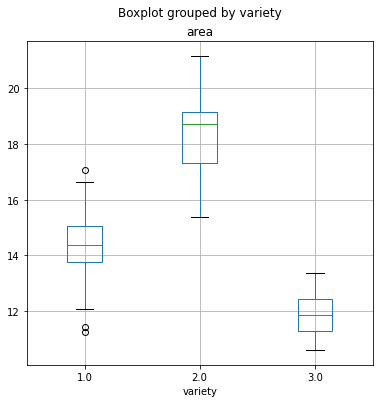

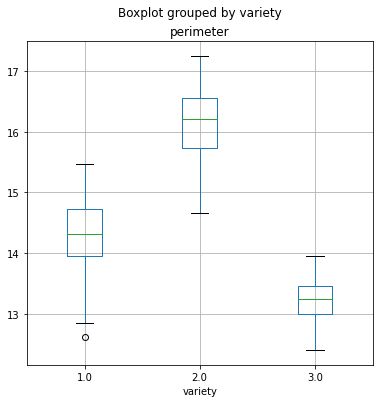

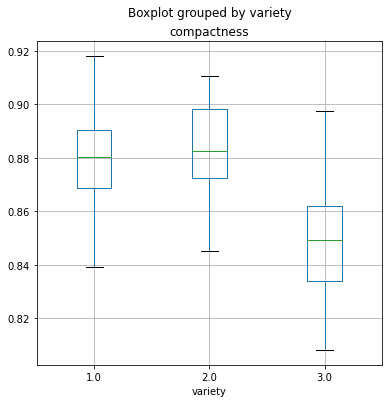

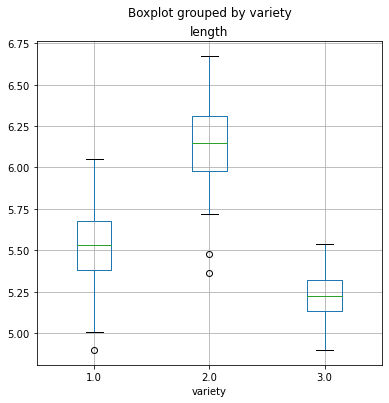

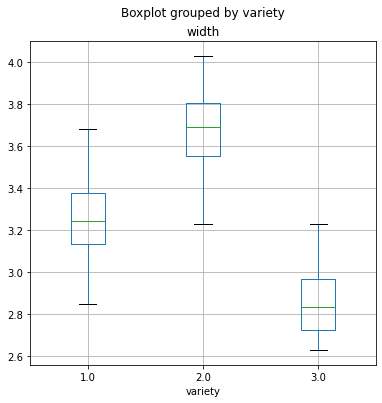

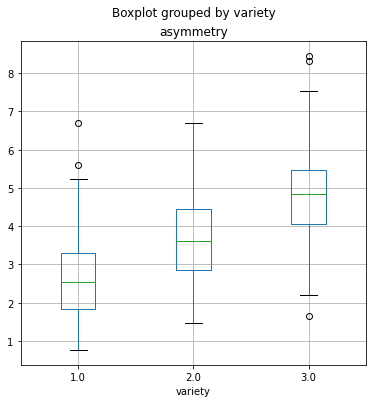

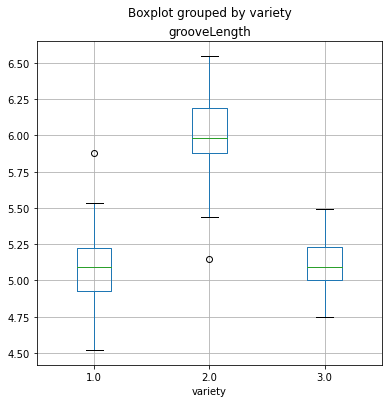

In [9]:
#boxplots
from matplotlib import pyplot as plt

seeds_features = ['area','perimeter','compactness','length','width', 'asymmetry', 'grooveLength']
seeds_label = 'variety'

for col in seeds_features:
    seeds.boxplot(column=col, by=seeds_label, figsize=(6,6))
    plt.title(col)
plt.show()

['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'grooveLength']


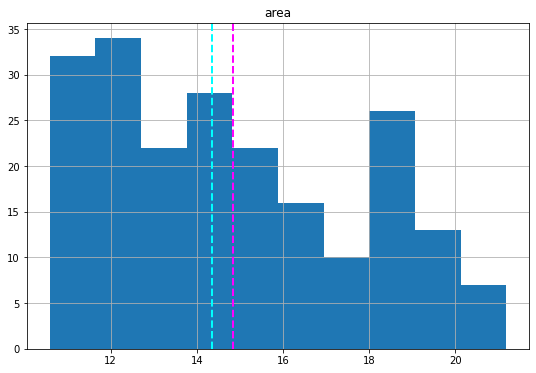

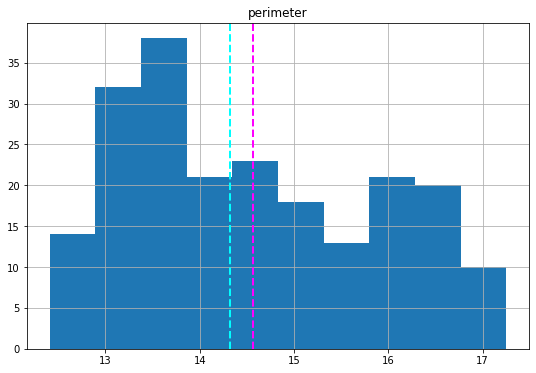

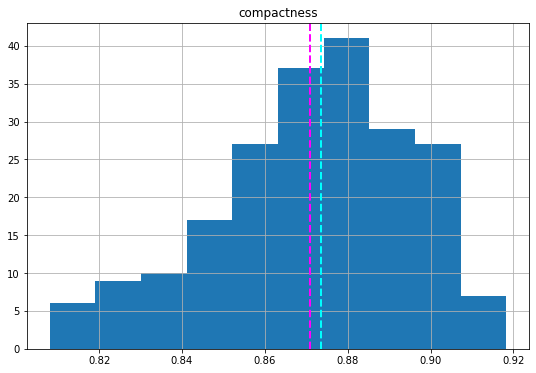

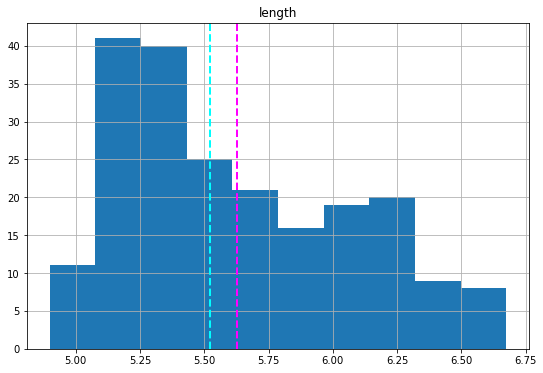

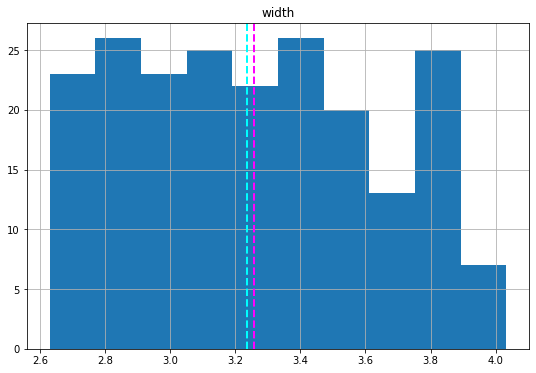

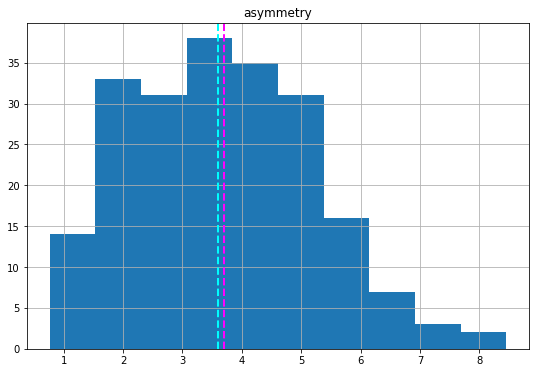

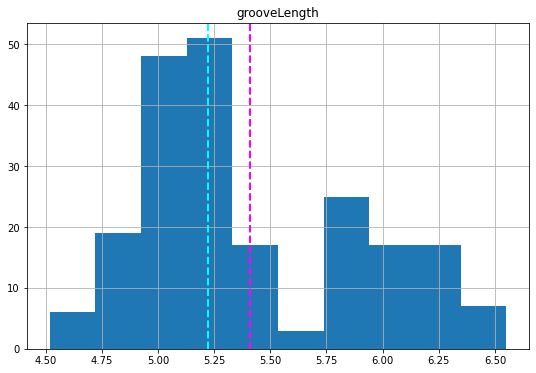

In [10]:
# histograms
from matplotlib import pyplot as plt

seeds_features = ['area','perimeter','compactness','length','width', 'asymmetry', 'grooveLength']
seeds_label = 'variety'

X, y = seeds[seeds_features].values, seeds[seeds_label].values

print(seeds_features)

for col in seeds_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = seeds[col]
    feature.hist(ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002CA0335BD30>,
      dtype=object)

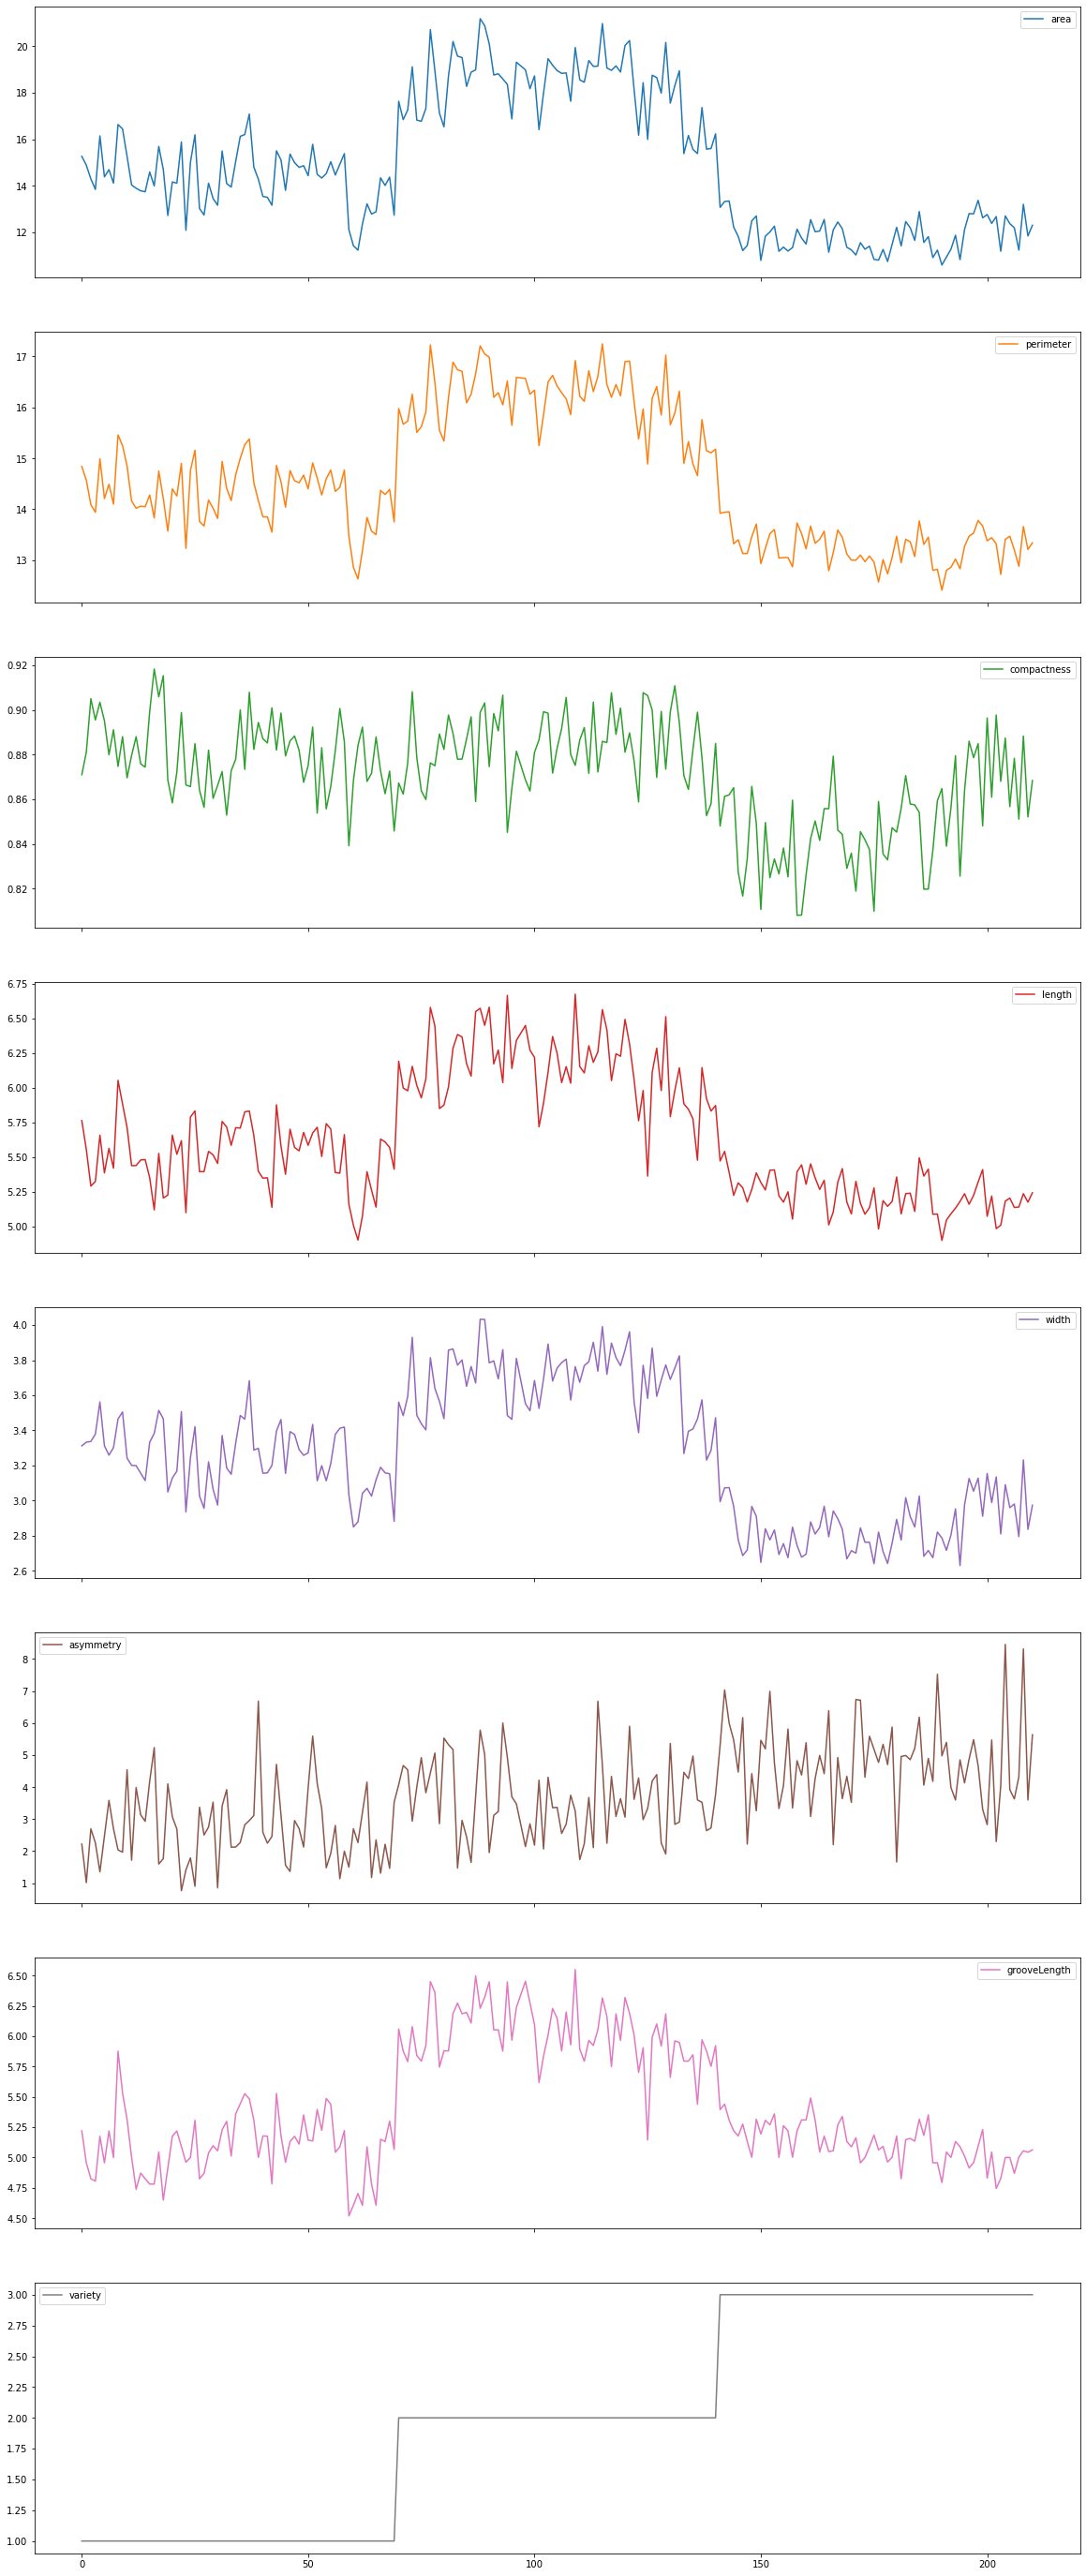

In [11]:
seeds.plot(subplots =True, sharex = True, figsize = (20,50))

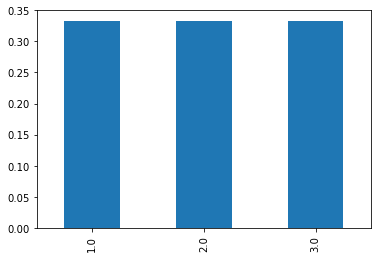

In [12]:
seeds['variety'].value_counts(normalize=True).plot.bar()

In [13]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = seeds.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

C:\Users\marcb\AppData\Local\Temp/ipykernel_14400/683175368.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,area,perimeter,compactness,length,width,asymmetry,grooveLength,variety
area,1.00,0.99,0.61,0.95,0.97,-0.23,0.86,-0.35
perimeter,0.99,1.00,0.53,0.97,0.94,-0.22,0.89,-0.33
compactness,0.61,0.53,1.00,0.37,0.76,-0.33,0.23,-0.53
length,0.95,0.97,0.37,1.00,0.86,-0.17,0.93,-0.26
width,0.97,0.94,0.76,0.86,1.00,-0.26,0.75,-0.42
asymmetry,-0.23,-0.22,-0.33,-0.17,-0.26,1.00,-0.01,0.58
grooveLength,0.86,0.89,0.23,0.93,0.75,-0.01,1.00,0.02
variety,-0.35,-0.33,-0.53,-0.26,-0.42,0.58,0.02,1.00


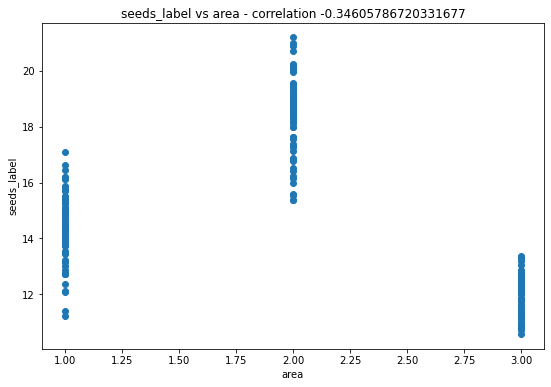

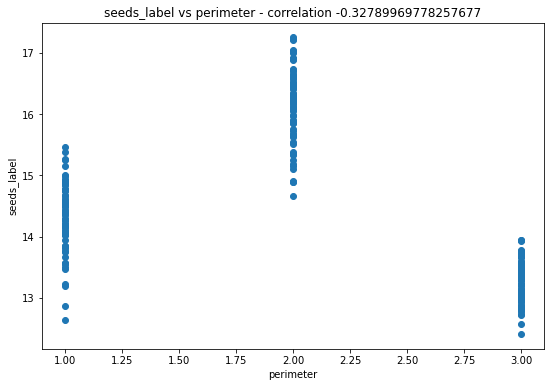

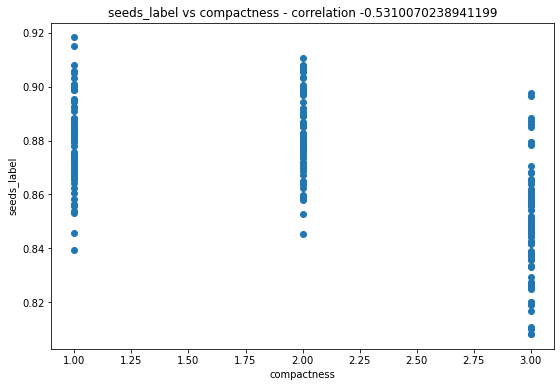

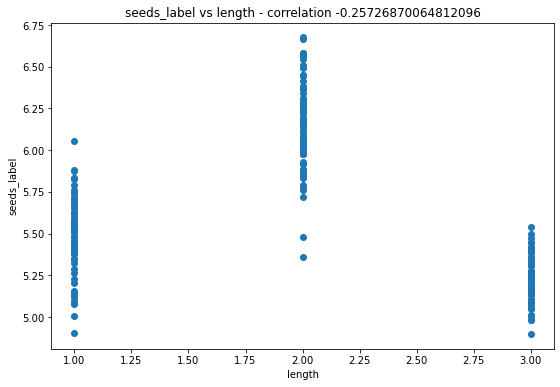

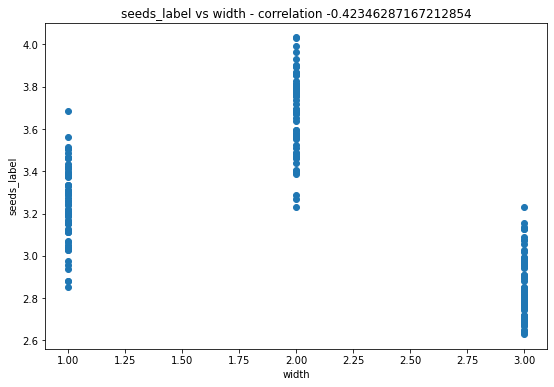

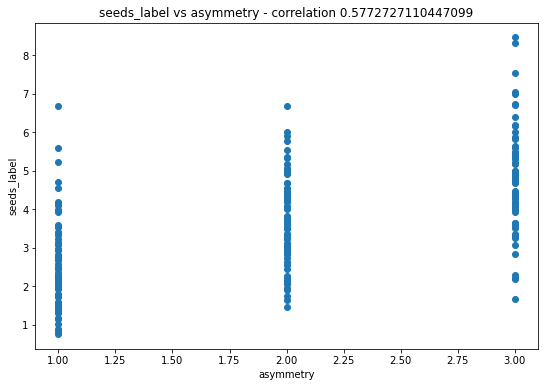

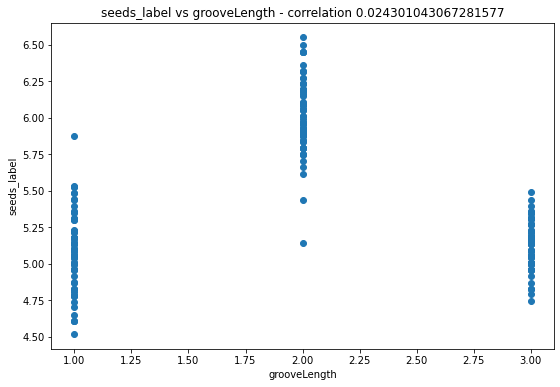

In [14]:
#correlation of seeds and if they are broken or not

for col in seeds_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = seeds[col]
    label = seeds['variety']
    corr = feature.corr(label)
    plt.scatter(x=label, y=feature)
    plt.xlabel(col)
    plt.ylabel('seeds_label')
    ax.set_title('seeds_label vs ' + col + ' - correlation ' + str(corr))

## PCA

3 methods
1. eigenvalues over 1 eigenvalues over one is 3 PCA's
3. 70 % all pcs First 2 also
4. knick pca  knick at 3 pcas

We can see that at 3 components, we meet nearly 95% of the data explained. So we can remove the unwanted columns.
3 components will give us good results

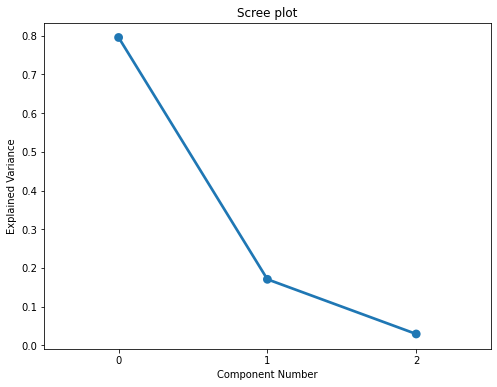

C:\ProgramData\Anaconda3\envs\aci2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\aci2021\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


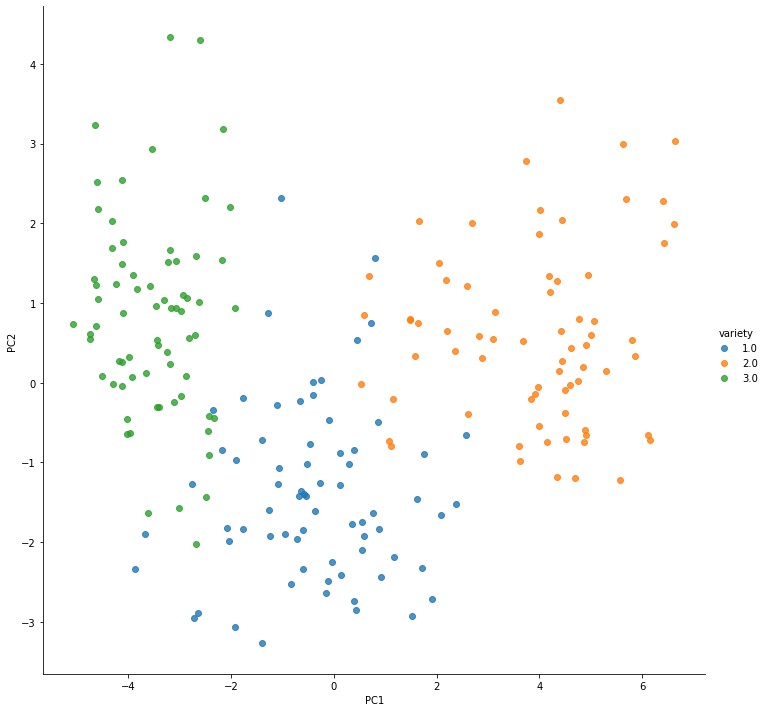

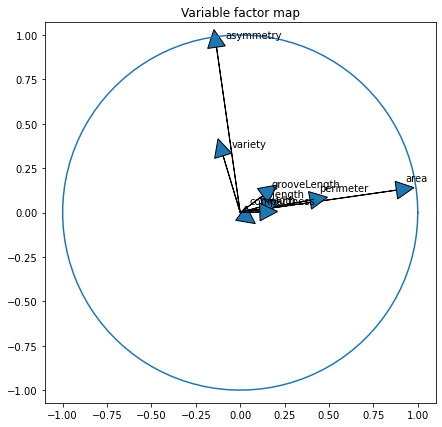

In [15]:
#PCA
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
n_components = 3

# Do the PCA.
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(seeds)

# Append the principle components for each entry to the dataframe
for i in range(0, n_components):
    seeds['PC' + str(i + 1)] = reduced[:, i]

seeds.head()

# Do a scree plot
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

# Show the points in terms of the first two PCs
g = sns.lmplot('PC1','PC2',hue='variety',data=seeds,
               fit_reg=False,
               scatter=True,
               size=10)

plt.show()

# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(7, 7))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             seeds.columns.values[i])

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

[56.21 80.33 94.05 99.36 99.79 99.93 99.98 99.99 99.99 99.99 99.99]
Eigenvalues: 
 [ 6.21286543e+00  2.66570312e+00  1.51651924e+00  5.86997583e-01
  4.80378563e-02  1.56393714e-02  6.06699084e-03  8.01989531e-04
  2.65083846e-16 -2.48369727e-16 -3.67670171e-16] 



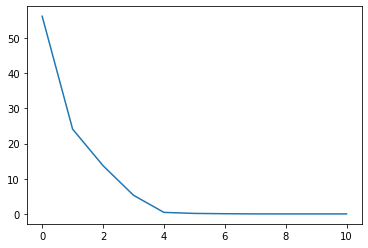

In [17]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(seeds)
pca.fit(X_std)
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var)

covariance_matrix = np.cov(X_std.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvalues: \n", eigen_values, "\n")

variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)

plt.plot(variance_explained)
plt.show()

## Split Data

Split the data with a ratio that you see fit. Make sure to set random_state.

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

randoms = [0,1,42,100,230]
models = "1"
iter = [0,1,2,3,4,5]
counter = 0

for random in randoms:
    counter += 1
    #scale normalize
    print('\nCounter:', counter)
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(seeds[seeds_features])

    #train test split
    seeds_label = ['variety']
    X = scaled
    y = seeds[seeds_label[0]].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random)

    #model
    mlp = MLPClassifier(hidden_layer_sizes=(8,12,8), activation='tanh', solver='adam', max_iter=1000, alpha=0.01)
    mlp.fit(X_train, y_train)
    predictions = mlp.predict(X_test)
    seeds_prob = mlp.predict_proba(X_test)
    auc = roc_auc_score(y_test,seeds_prob, multi_class='ovr')

    #predictions
    print('Average AUC:', auc)
    print (confusion_matrix(y_test, predictions))
    print (classification_report(y_test, predictions))



Counter: 1
Average AUC: 0.9957449160035368
[[13  0  0]
 [ 2 14  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

         1.0       0.87      1.00      0.93        13
         2.0       1.00      0.88      0.93        16
         3.0       1.00      1.00      1.00        13

    accuracy                           0.95        42
   macro avg       0.96      0.96      0.95        42
weighted avg       0.96      0.95      0.95        42


Counter: 2


C:\ProgramData\Anaconda3\envs\aci2021\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Average AUC: 1.0
[[20  0  0]
 [ 0  9  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00         9
         3.0       1.00      1.00      1.00        13

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42


Counter: 3


C:\ProgramData\Anaconda3\envs\aci2021\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Average AUC: 0.9947145075038814
[[11  0  0]
 [ 0 14  0]
 [ 2  0 15]]
              precision    recall  f1-score   support

         1.0       0.85      1.00      0.92        11
         2.0       1.00      1.00      1.00        14
         3.0       1.00      0.88      0.94        17

    accuracy                           0.95        42
   macro avg       0.95      0.96      0.95        42
weighted avg       0.96      0.95      0.95        42


Counter: 4


C:\ProgramData\Anaconda3\envs\aci2021\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Average AUC: 1.0
[[ 9  0  0]
 [ 0 15  0]
 [ 0  0 18]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        15
         3.0       1.00      1.00      1.00        18

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42


Counter: 5
Average AUC: 0.9964763383359209
[[10  0  1]
 [ 0 14  0]
 [ 0  0 17]]
              precision    recall  f1-score   support

         1.0       1.00      0.91      0.95        11
         2.0       1.00      1.00      1.00        14
         3.0       0.94      1.00      0.97        17

    accuracy                           0.98        42
   macro avg       0.98      0.97      0.97        42
weighted avg       0.98      0.98      0.98        42



C:\ProgramData\Anaconda3\envs\aci2021\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
